In [56]:
#1-Import libraries, Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load the dataset
dataset = pd.read_csv('/content/Student-Marks3-0.csv')

dataset.head(len(dataset))

,time_study,Marks
0,NaN,19.202
1,0.096,600.660
2,3.133,13.811
3,7.909,49.018
4,7.811,55.299
...,...,...
174,993.120,10.844
175,NaN,19.590
176,4.869,21.379
177,20.000,4.000


In [57]:
#2-Data Preprocessing
#Remove missing values
dataset.dropna(inplace=True)

#Remove duplicates
dataset.drop_duplicates(inplace=True)

#Remove outliers
#Remove data points where Marks are below 0 or above 50
dataset = dataset[(dataset['Marks'] >= 0) & (dataset['Marks'] <= 50)]
#Remove data points where time_study are below 0 or above 8
dataset = dataset[(dataset['time_study'] >= 0) & (dataset['time_study'] <= 8)]

dataset.head(len(dataset))

,time_study,Marks
2,3.133,13.811
3,7.909,49.018
6,6.063,29.889
7,3.413,17.264
8,4.410,20.348
...,...,...
153,6.376,36.024
155,7.591,44.158
158,7.649,48.583
171,7.649,49.583


In [58]:
#View descriptive statistics
print(dataset.describe())

       time_study      Marks
count   94.000000  94.000000
mean     4.916957  27.520809
std      2.074846  13.068212
min      1.033000   6.053000
25%      3.261500  17.194250
50%      4.756000  24.422500
75%      6.578750  39.076750
max      7.957000  49.583000


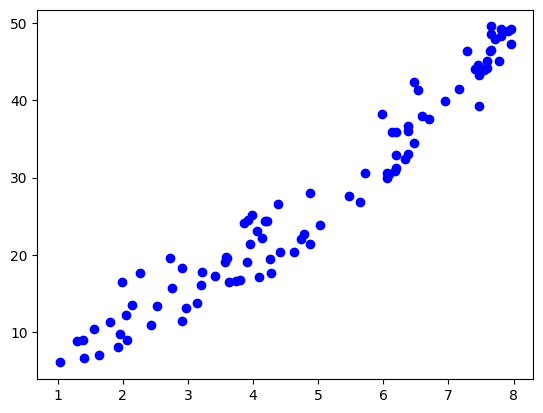

In [59]:
from sklearn.model_selection import train_test_split

#3-Split the data
#Split the data into features(X) and target(y)
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
#Can the data set be represented as a linear regression?
plt.scatter(x,y, color='blue')
plt.show()
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [60]:
from sklearn.linear_model import LinearRegression
#4-Train a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [61]:
#5-Make predictions on the test set
y_pred = model.predict(x_test)
y_pred

array([34.38411581, 14.42361296, 13.00001711, 27.21787906, 26.36130868,
       33.91360532, 42.75678972, 41.0195202 ,  9.59786431, 19.29158691,
       36.84524762, 23.59253539, 10.73191524, 36.27218997, 42.85933687,
       36.29028653, 15.35256957,  9.41086655, 23.0375743 , 43.95116251,
       15.70243635, 15.3827305 , 22.4403879 , 23.25473299, 43.60129573,
       12.51744224, 14.2788405 , 44.92837661, 21.45110943, 45.80907574,
       42.85933687, 18.39882341])

In [62]:
y_test

array([29.889, 15.725, 13.416, 28.043, 22.073, 38.278, 44.544, 41.444,
        9.742, 19.128, 34.426, 17.672, 13.562, 36.024, 43.343, 36.746,
       11.397,  8.1  , 24.394, 46.583, 13.119, 18.238, 17.171, 24.318,
       45.158, 10.844, 19.564, 49.299, 24.451, 47.321, 44.343, 17.264])

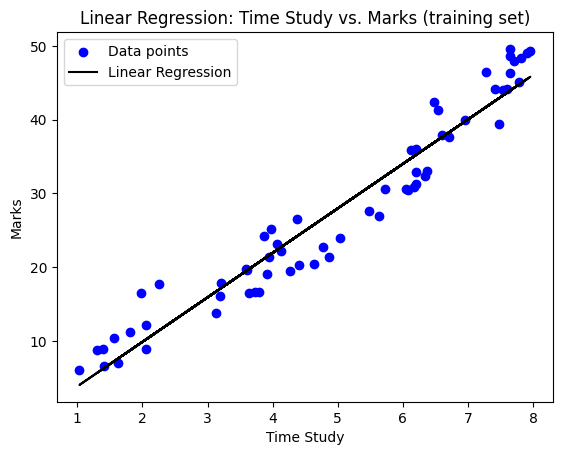

In [63]:
#6-Visualize the data points and Regression line

#Visualize the training set
#Scatter plot of the data points
plt.scatter(x_train, y_train, color='blue', label='Data points')

#Linear Regression line
plt.plot(x_train, model.predict(x_train), color='black', label='Linear Regression')

plt.xlabel('Time Study')
plt.ylabel('Marks')
plt.title('Linear Regression: Time Study vs. Marks (training set)')
plt.legend()
plt.show()

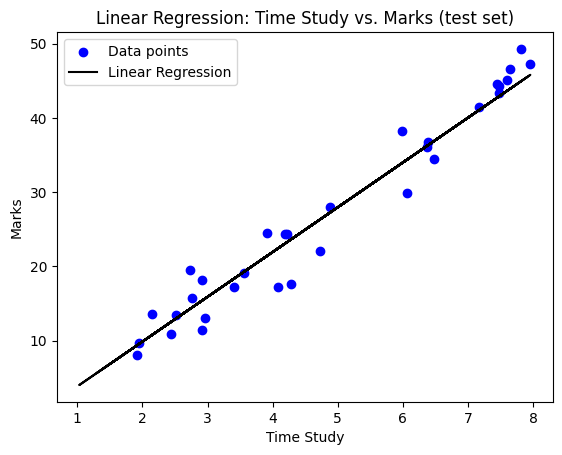

In [64]:
#Visualize the test set
#Scatter plot of the data points
plt.scatter(x_test, y_test, color='blue', label='Data points')

#Linear Regression line
plt.plot(x_train, model.predict(x_train), color='black', label='Linear Regression')

plt.xlabel('Time Study')
plt.ylabel('Marks')
plt.title('Linear Regression: Time Study vs. Marks (test set)')
plt.legend()
plt.show()


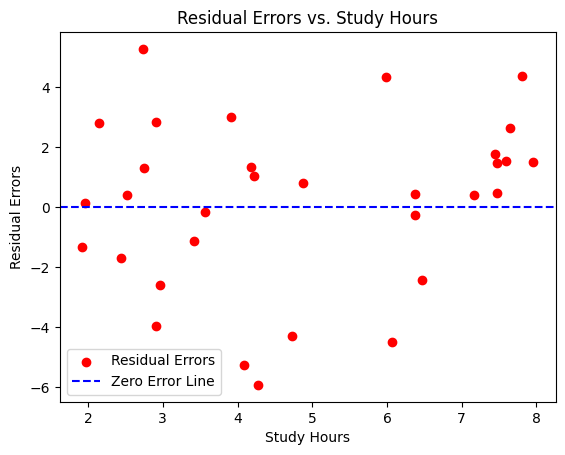

In [70]:
#7-Calculate and visualize the residual errors
residuals = y_test - y_pred

#Scatter plot of the residual errors
plt.scatter(x_test, residuals, color='red', label='Residual Errors', marker='o')

plt.xlabel('Study Hours')
plt.ylabel('Residual Errors')
plt.title('Residual Errors vs. Study Hours')

#Horizontal line at y=0 to indicate zero error
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Error Line')
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#8-Measure the model's performance
#Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Absolute Error (MAE): 2.24
Mean Squared Error (MSE): 7.81
R-squared (R2): 0.95


In [67]:
#9-Check for overfitting and underfitting
#by comparing the performance metrics on the training and the test sets

#Make predictions on the training set
y_train_pred = model.predict(x_train)

#Evaluate model performance on the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Training Set Performance:')
print(f'Mean Absolute Error (MAE): {mae_train:.2f}')
print(f'Mean Squared Error (MSE): {mse_train:.2f}')
print(f'R-squared (R2): {r2_train:.2f}')
print('Test Set Performance:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Training Set Performance:
Mean Absolute Error (MAE): 2.79
Mean Squared Error (MSE): 10.75
R-squared (R2): 0.94
Test Set Performance:
Mean Absolute Error (MAE): 2.24
Mean Squared Error (MSE): 7.81
R-squared (R2): 0.95


In [85]:
#Ask the user to enter study hours
try:
   study_hours = float(input("Enter the number of study hours: "))
except ValueError:
   print("Invalid input. Please enter a valid number.")
   exit(1)

#Make a prediction based on the user's input
user_input = np.array([[study_hours]]) # Reshape the input to match the model's expected shape
predicted_mark = model.predict(user_input)

#Ensure the predicted mark does not exceed 50
if predicted_mark[0] > 50:
    predicted_mark[0] = 50 # Set the predicted mark to 50 if it's above 50

#Display the predicted mark
print(f"Predicted Mark for {study_hours} study hours: {predicted_mark[0]:.2f}")


Enter the number of study hours: 7.56
Predicted Mark for 7.56 study hours: 43.41
